> Jiahui Tang

**Spec**: (Same as 4.1)
* OS: AWS VM Ubuntu 18.04 (x2.2large)
* Kernal: Linux ip-172-31-37-178 5.4.0-1039-aws #41~18.04.1-Ubuntu SMP Fri Feb 26 11:20:14 UTC 2021 x86_64 x86_64 x86_64 GNU/Linux

* Compiler: gcc version 7.5.0 (Ubuntu 7.5.0-3ubuntu1~18.04) 
* Flag: -Ofast
* Details:

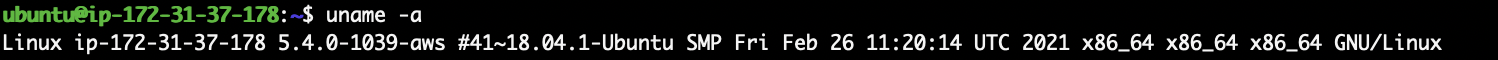
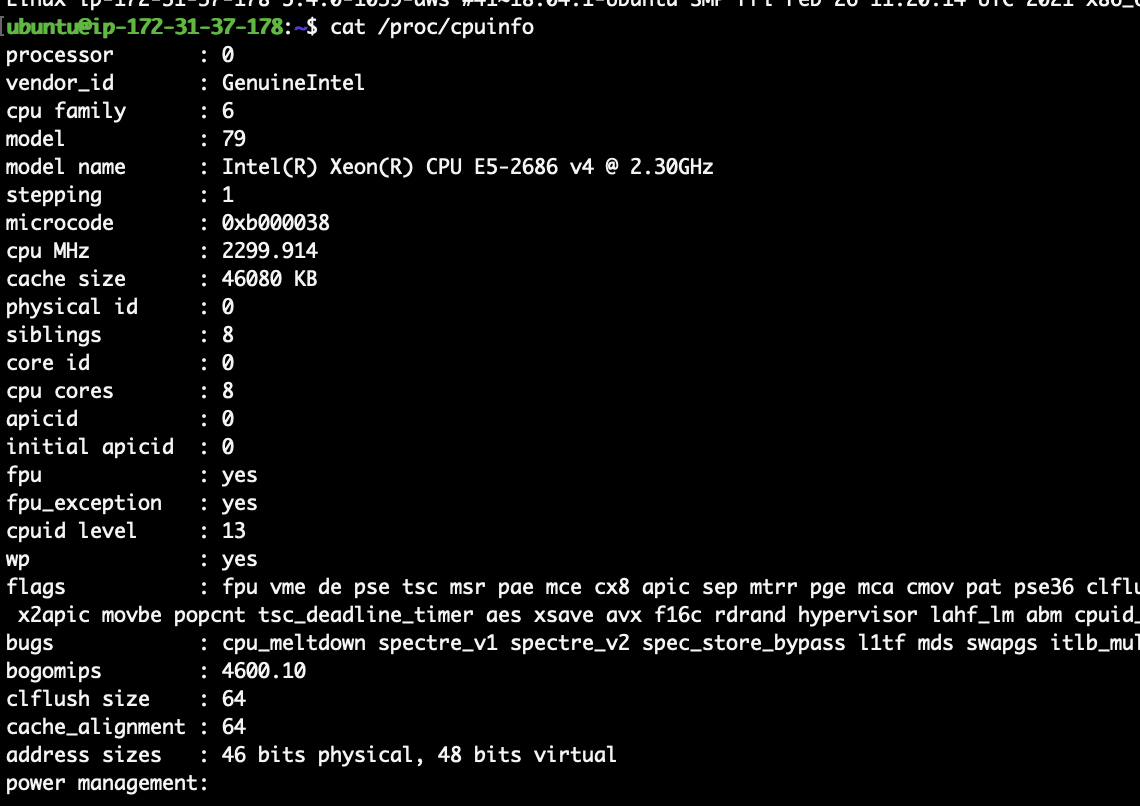
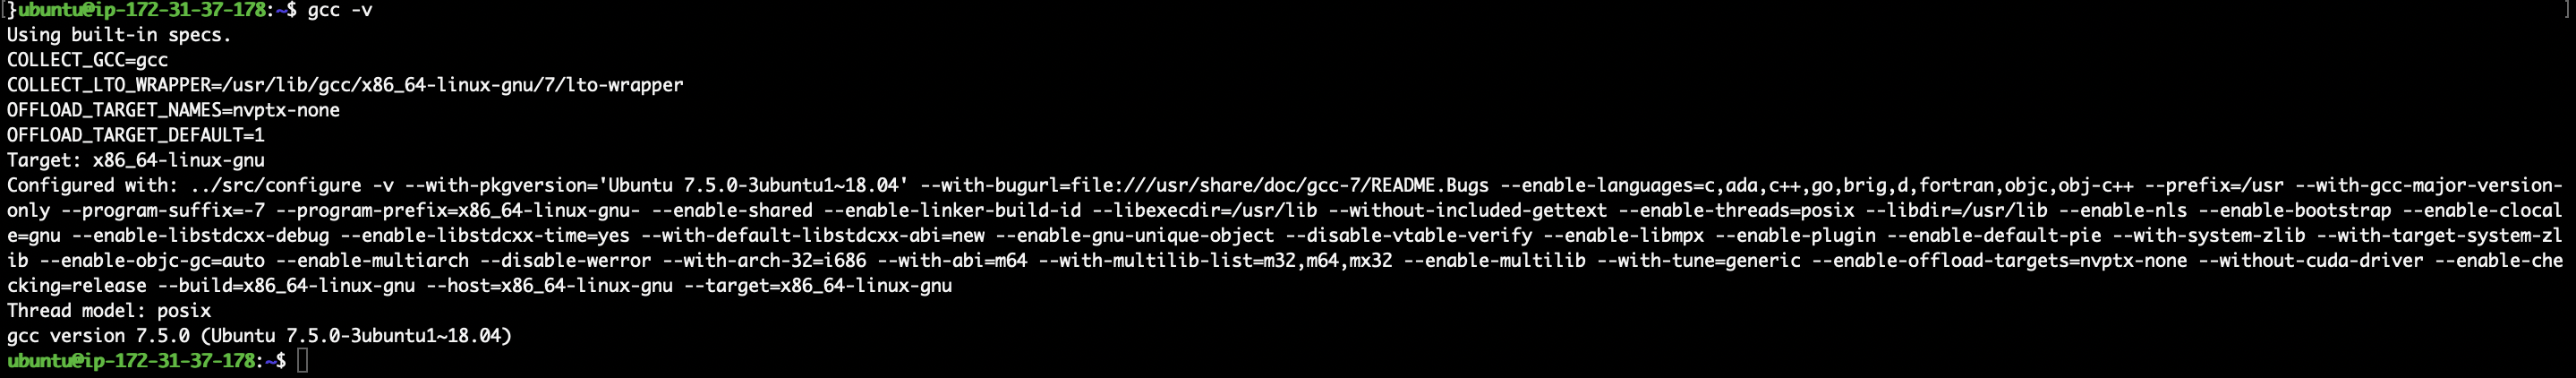
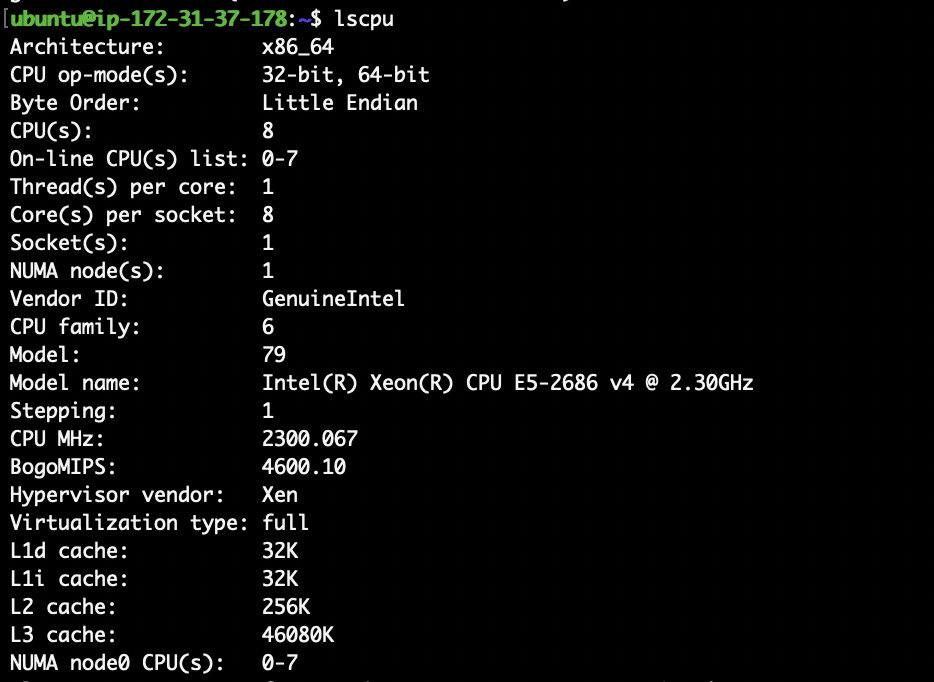

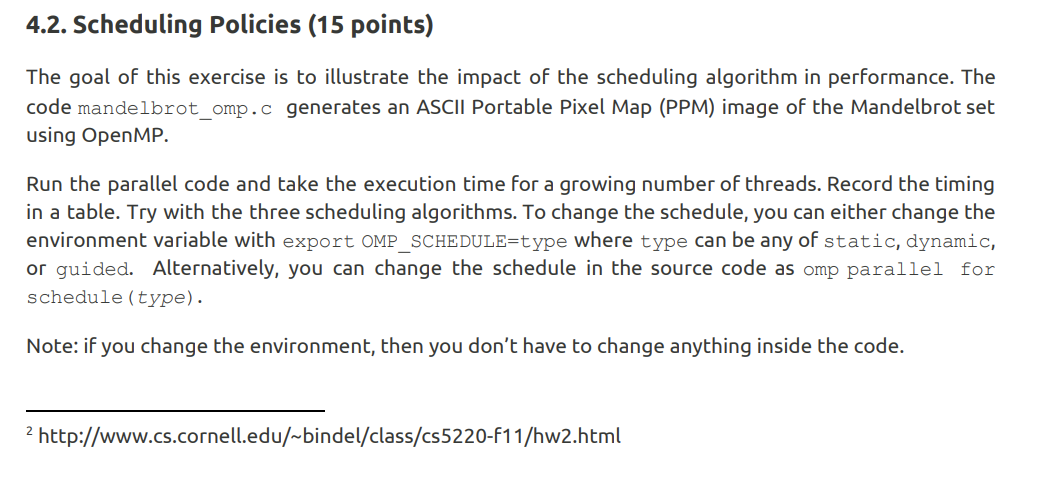
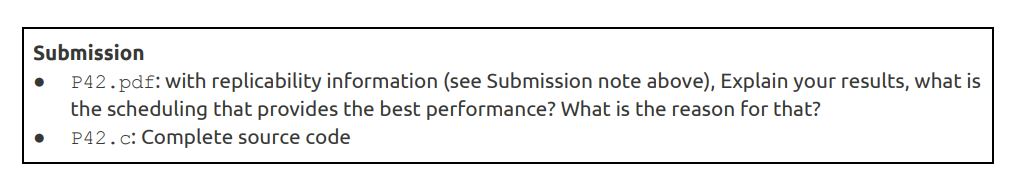

**(4.2)**. Table for improvements in elapsed execution time 

(*unit: seconds*)


| OMP_NUM_THREADS   | 2 cores |3 cores |  4 cores | 5 cores |6 cores| 7 cores|8 cores|
| ----------- | ----------- |----------- |----------- |----------- |----------- |----------- |----------- |
| type = static |0.119479|0.213677|0.11835|0.151437|0.106952 |0.117311 |0.0903508|
| type = dynamic |0.118285       |0.0788323   |0.0592294     |0.0474653  |0.03963   | 0.0340479    |0.0299404|
| type = guided | 0.11817|0.153298  |0.11719      |0.0840822 |0.0789541 |0.0672873 |0.0567206|


## Discussion:

   * The `type=dynamics` provides the best performance. We could observe the performance of `dynamic > guided > static`
       * It makes sense as static assigns each thread into a fixed-size chunk, and it is the default schedule version. 
       * However, if using dynamic, work is assigned as a thread requests it. 
       * For guided type, big chunks are allocated first and smaller and smaller chunks later.
       * For this task, we need dynamic to allocate tasks so that all threads could be parallelly and fully utilized, acheiving fastest execution time.
       
   * Besides, we could also see **even** number of cores perform much better than **odd** number of cores, relatively. It may be due to task could be distributed evenly for all cores if it is an even number. And if it's an odd number, there are always core that is not fully utilized and not saturated, thus resulting in slower performance.
   * We could also observe, as number of cores increases, the time it takes become less and less for odd number and even number of cores, respectively. This is as expected, as explained in 4.1, as more cores allow more concurrency when shared same memory, that could simultaneously execute statements in the parallel region.